# 0. 사용할 패키지 불러오기

In [1]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.python.keras.models import load_model

# 1. 데이터 불러오기

In [ ]:
import numpy as np
import glob
import sys
from sklearn.model_selection import train_test_split

x_train = np.empty((0, 320, 320, 3))
y_train = np.empty((0, 3))
print(y_train.shape)

training_data = glob.glob('/home/pirl/Documents/splited_action_data2/npz_data/*.npz')
#print(training_data)
idx=1
for single_npz in training_data:
    with np.load(single_npz) as data:
        #print(data.files)
        x = data['train']
        y = data['training_labels']
        #print(x.shape)
    x = np.reshape(x, (-1, 320, 320, 3))
    
    x_train = np.vstack((x_train, x))
    y_train = np.vstack((y_train, y))
    if idx % 2000 ==0:
        print(idx)
    idx+=1
print(x_train.shape)
# train test split, 7:3
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state = 42)

y_train = y_train[:,:]
y_test = y_test[:,:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(0, 3)
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000
90000
92000
94000
96000
98000
100000
102000
104000
106000
108000
110000
112000
114000
116000
118000
120000
122000
124000
126000
128000
130000
132000
134000
136000
138000
140000
142000
144000
146000
148000
150000
152000
154000
156000
158000
160000
162000
164000
166000
168000
170000
172000
174000
176000
178000
180000
182000
184000
186000
188000
190000
192000
194000
196000
198000
200000
202000
204000
206000
208000
210000
212000
214000
216000
218000
220000
222000
224000
226000
228000
230000
232000


# 데이터 확인

In [ ]:
#import pandas as pd

#y_data = pd.DataFrame(y_total[:, :])

In [ ]:
#y_data.count()

In [ ]:
#left = y_data.loc[y_data[:][0] == 1]

In [ ]:
#left.count()

In [ ]:
#right = y_data.loc[y_data[:][1] == 1]

In [ ]:
#right.count()

In [ ]:
#forward = y_data.loc[y_data[:][2] == 1]

In [ ]:
#forward.count()

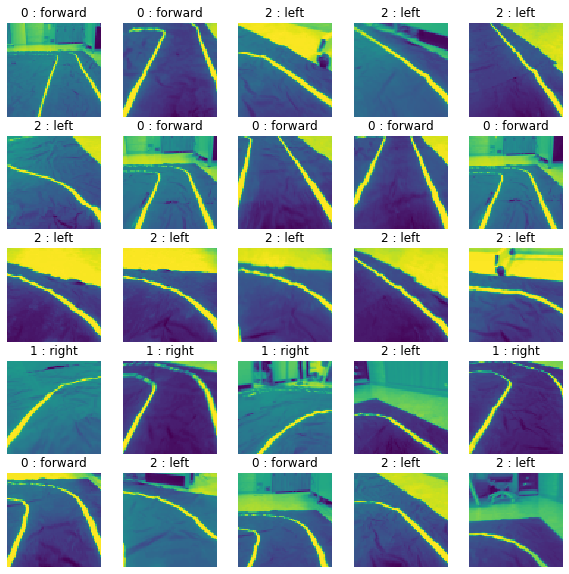

In [52]:
# 데이터 확인

from matplotlib import pyplot as plt
%matplotlib inline

plt_row = 5
plt_col = 5
plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):

    sub_plt = axarr[int(i/plt_row), int(i%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(64, 64))
    
    label = np.argmax(y_train[i])
                      
    if label == 2 :
        direction = 'left'
    elif label == 1:
        direction = 'right'
    elif label == 0:
        direction = 'forward'
#     elif label == 3:
#         direction = 'backward'
                      
    sub_plt_title = str(label) + " : " + direction
    sub_plt.set_title(sub_plt_title)

plt.show()

# 3. 모델 생성

In [53]:
# image size = 160 x 320
def posla_net():
    
    # model setting
    H = 64
    W = 64
    CH = 1

    inputShape = (H, W, CH)

    activation = 'relu'
    keep_prob_conv = 0.25
    keep_prob_dense = 0.5

    #init = 'glorot_normal'
    #init = 'he_normal'
    init = 'he_uniform'
    chanDim = -1
    classes = 3
    
    model = Sequential()
    
    # CONV => RELU => POOL
    model.add(Conv2D(3, (3, 3), padding="valid", input_shape=inputShape, kernel_initializer=init, activation=activation))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(9, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(18, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(80, kernel_initializer=init, activation=activation))
    model.add(Dropout(keep_prob_dense))
    
    model.add(Dense(15, kernel_initializer=init, activation=activation))
    model.add(Dropout(keep_prob_dense))
    
    # softmax classifier
    model.add(Dense(classes , activation = 'softmax'))
    
    return model

In [54]:
model = posla_net()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 3)         30        
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 3)         12        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 9)         252       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 9)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 18)        1476      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 18)         

In [55]:
from tensorflow.python.keras.utils import plot_model
plot_model(model, to_file= 'video_net_plot.png', show_shapes = True, show_layer_names = True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


# 4. 모델 파라미터 셋팅

적은 수의 이미지 데이터가 존재할 경우 데이터를 늘리는 용도로 사용

In [56]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

In [57]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [58]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [59]:
# initialize the model
# EPOCHS = 50
# INIT_LR = 1e-3
# BS = 32
# split_ratio = 0.2

In [60]:
EPOCHS = 50
INIT_LR = 1e-4
BS = 256
split_ratio = 0.2

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])
 

[INFO] compiling model...


# 5. 모델 훈련

In [61]:
from tensorflow.keras.utils import to_categorical


In [62]:
y_binary = to_categorical(y_train)

In [65]:
hist = model.fit(x_train, y_train,
                 epochs=EPOCHS, validation_steps=BS, 
                 validation_split=split_ratio, 
                 verbose = 1
                 ,callbacks=[reduce_lr]
                )

Train on 1033 samples, validate on 259 samples
Epoch 1/50
1033/1033 [==============================] - 21s 20ms/sample - loss: 4.8656 - acc: 0.3330 - val_loss: 2.8212 - val_acc: 0.4865
Epoch 2/50
1033/1033 [==============================] - 19s 19ms/sample - loss: 3.2777 - acc: 0.3533 - val_loss: 1.4892 - val_acc: 0.4672
Epoch 3/50
1033/1033 [==============================] - 19s 19ms/sample - loss: 2.2050 - acc: 0.4037 - val_loss: 1.0640 - val_acc: 0.4788
Epoch 4/50
1033/1033 [==============================] - 21s 20ms/sample - loss: 1.8751 - acc: 0.4356 - val_loss: 0.8855 - val_acc: 0.5135
Epoch 5/50
1033/1033 [==============================] - 20s 19ms/sample - loss: 1.6484 - acc: 0.4211 - val_loss: 0.8351 - val_acc: 0.5637
Epoch 6/50
1033/1033 [==============================] - 20s 19ms/sample - loss: 1.5170 - acc: 0.4327 - val_loss: 0.8006 - val_acc: 0.6448
Epoch 7/50
1033/1033 [==============================] - 19s 19ms/sample - loss: 1.3343 - acc: 0.4821 - val_loss: 0.7818 - val

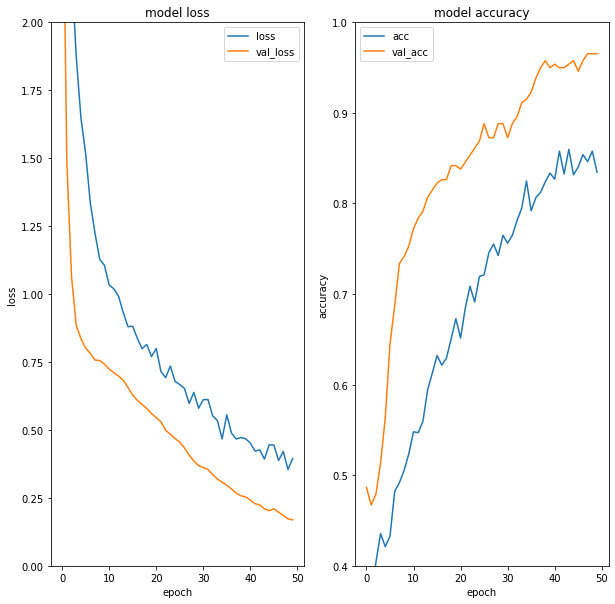

In [66]:
plt.subplot(1, 2, 1)
plt.title('model loss')
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.ylim((0,2))

plt.subplot(1, 2, 2)
plt.title('model accuracy')
plt.plot(hist.history['acc'], label="acc")
plt.plot(hist.history['val_acc'], label="val_acc")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.ylim((0.4, 1))


plt.show();

# 6. 모델 결과 확인

In [67]:
#l_model = load_model('./model_data/VGG_model.h5')

In [68]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=BS)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

554/554 [==============================] - 0s 351us/sample - loss: 0.1378 - acc: 0.9639
## evaluation loss and_metrics ##
[0.1378305409143978, 0.9638989]


In [69]:
xhat_idx = np.random.choice(x_test.shape[0], 10)
xhat = x_test[xhat_idx]

yhat_classes = model.predict_classes(xhat)

for i in range(10):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat_classes[i]))

True : 0, Predict : 0
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0


# 7. 최종 모델 훈련

In [70]:
x_total = np.vstack((x_train, x_test))
y_total = np.vstack((y_train, y_test))

print(x_total.shape)
print(y_total.shape)

(1846, 64, 64, 1)
(1846, 3)


In [71]:
early_stopping = EarlyStopping(monitor='loss', patience=10)

In [72]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [73]:
EPOCHS = 50
INIT_LR = 1e-4
BS = 256
split_ratio = 0.2

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] compiling model...


In [74]:
hist = model.fit(x_total, y_total, 
                 epochs=EPOCHS, batch_size=BS, 
                 #validation_split=split_ratio, 
                 verbose = 1
                 ,callbacks=[reduce_lr]
                )

Train on 1846 samples
Epoch 1/50
1846/1846 [==============================] - 2s 1ms/sample - loss: 0.4010 - acc: 0.8516
Epoch 2/50
1846/1846 [==============================] - 2s 950us/sample - loss: 0.3949 - acc: 0.8499
Epoch 3/50
1846/1846 [==============================] - 2s 960us/sample - loss: 0.3767 - acc: 0.8673
Epoch 4/50
1846/1846 [==============================] - 2s 930us/sample - loss: 0.3505 - acc: 0.8629
Epoch 5/50
1846/1846 [==============================] - 2s 940us/sample - loss: 0.3622 - acc: 0.8624
Epoch 6/50
1846/1846 [==============================] - 2s 918us/sample - loss: 0.3291 - acc: 0.8797
Epoch 7/50
1846/1846 [==============================] - 2s 891us/sample - loss: 0.3153 - acc: 0.8900
Epoch 8/50
1846/1846 [==============================] - 2s 897us/sample - loss: 0.3504 - acc: 0.8694
Epoch 9/50
1846/1846 [==============================] - 2s 946us/sample - loss: 0.3385 - acc: 0.8716
Epoch 10/50
1846/1846 [==============================] - 2s 962us/sampl

In [75]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=BS)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

554/554 [==============================] - 0s 484us/sample - loss: 0.0267 - acc: 0.9892
## evaluation loss and_metrics ##
[0.026651852663323983, 0.98916966]


In [76]:
xhat_idx = np.random.choice(x_test.shape[0], 10)
xhat = x_test[xhat_idx]

yhat_classes = model.predict_classes(xhat)

for i in range(10):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat_classes[i]))

True : 1, Predict : 1
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 0, Predict : 0
True : 1, Predict : 1
True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2


# 8. 모델 저장

In [ ]:
model.save('./model_data/video_model_3.h5')